In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# importando dados 
import os
PATH = os.getcwd() + os.path.join('/data', 'house-prices')
df = pd.read_csv(os.path.join(PATH, 'train.csv'))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df = pd.get_dummies(df)
df = df.dropna(axis=1)
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,False,False,False,True,False,False,False,False,True,False
1,2,20,9600,6,8,1976,1976,978,0,284,...,False,False,False,True,False,False,False,False,True,False
2,3,60,11250,7,5,2001,2002,486,0,434,...,False,False,False,True,False,False,False,False,True,False
3,4,70,9550,7,5,1915,1970,216,0,540,...,False,False,False,True,True,False,False,False,False,False
4,5,60,14260,8,5,2000,2000,655,0,490,...,False,False,False,True,False,False,False,False,True,False


In [22]:
df.drop('Id', axis=1, inplace=True)
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

In [23]:
# criando modelo
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0, max_depth=3)

# treinando modelo
model.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

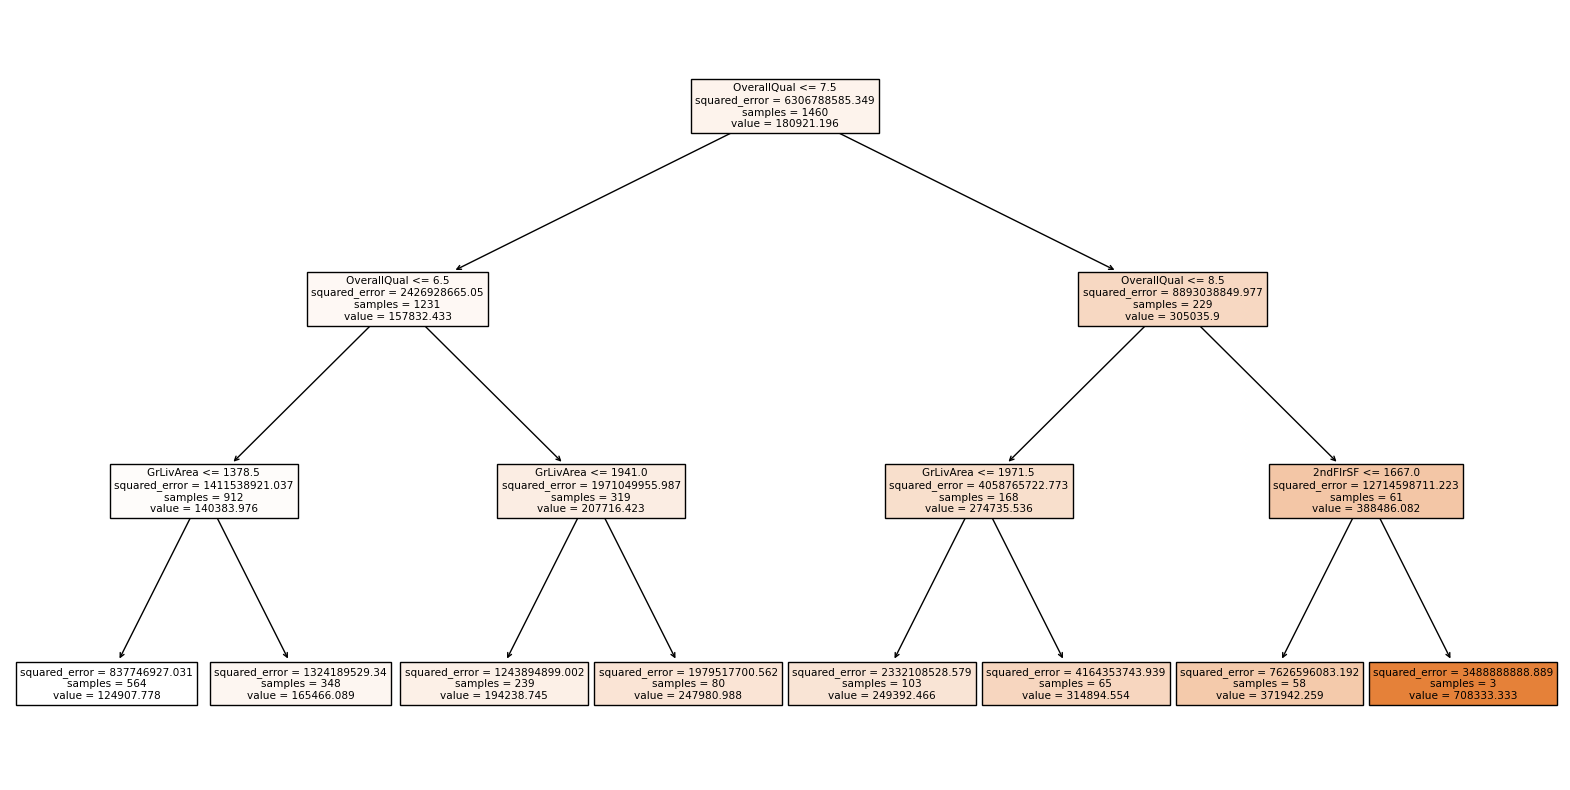

In [25]:
# plotando o modelo
from sklearn.tree import plot_tree

# Salvar plot como imagem

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.savefig('tree.png')
plt.show()

Aqui, estamos usando um modelo de árvore de decisão simples de profundidade 3, apenas para fins de visualização. Não se preocupe com os detalhes; o importante é que estamos treinando um modelo de árvore de decisão e, em seguida, usando uma função para visualizar o modelo. O importante é notar como o modelo divide o espaço com base nos valores de recurso e, em seguida, atribui uma cor a cada região.